In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


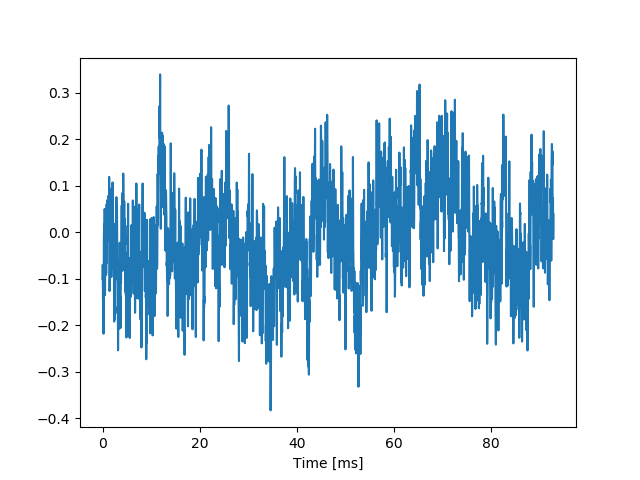

Text(0.5,0,'Time [ms]')

In [42]:
F_SAMPLE = 44100
#freqs = linspace(1, 5000, 128) * 2 * pi / F_SAMPLE
freqs = logspace(0, 4, 32) * 2 * pi / F_SAMPLE
phs = 2 * pi * (rand(freqs.size) * 2 - 1)
amps = ones_like(freqs)
ccdData = ones_like(freqs)
chunk = arange(128)
offs = 1
freqsv, chunkv = meshgrid(freqs, chunk)

samples = []
for i in range(32):
    dat = amps * sin(freqsv * (offs+chunkv) + phs)
    samples.append(mean(dat, 1))
    offs += chunk.size
samples = hstack((samples))
close("all")
plot(linspace(0, samples.size/F_SAMPLE, samples.size)*1000, samples)
xlabel("Time [ms]")

# Linear map CCD --> frequencies

<IPython.core.display.Javascript object>


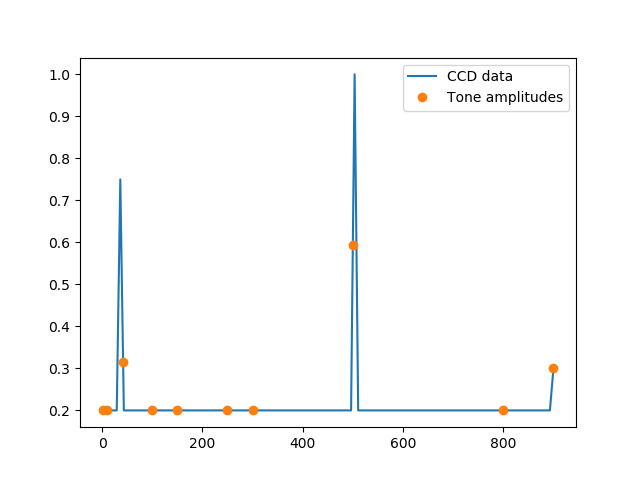

In [85]:
ccdDat = ones(128) * 0.2
ccdDat[5] = 0.75
ccdDat[71] = 1
ccdDat[-1] = 0.3
freqs = array([1, 10, 42, 100, 150, 250, 300, 500, 800, 900])
amps = interp(freqs, linspace(freqs[0], freqs[-1], ccdDat.size), ccdDat)
close("all")
plot(linspace(freqs[0], freqs[-1], ccdDat.size), ccdDat, label="CCD data")
plot(freqs, amps, "o", label="Tone amplitudes")
legend()

In [90]:
genfromtxt("./piano_notes", skip_header=1, usecols=(1), comments=None)

array([  16.35,   17.32,   18.35,   19.45,   20.6 ,   21.83,   23.12,
         24.5 ,   25.96,   27.5 ,   29.14,   30.87,   32.7 ,   34.65,
         36.71,   38.89,   41.2 ,   43.65,   46.25,   49.  ,   51.91,
         55.  ,   58.27,   61.74,   65.41,   69.3 ,   73.42,   77.78,
         82.41,   87.31,   92.5 ,   98.  ,  103.83,  110.  ,  116.54,
        123.47,  130.81,  138.59,  146.83,  155.56,  164.81,  174.61,
        185.  ,  196.  ,  207.65,  220.  ,  233.08,  246.94,  261.63,
        277.18,  293.66,  311.13,  329.63,  349.23,  369.99,  392.  ,
        415.3 ,  440.  ,  466.16,  493.88,  523.25,  554.37,  587.33,
        622.25,  659.25,  698.46,  739.99,  783.99,  830.61,  880.  ,
        932.33,  987.77, 1046.5 , 1108.73, 1174.66, 1244.51, 1318.51,
       1396.91, 1479.98, 1567.98, 1661.22, 1760.  , 1864.66, 1975.53,
       2093.  , 2217.46, 2349.32, 2489.02, 2637.02, 2793.83, 2959.96,
       3135.96, 3322.44, 3520.  , 3729.31, 3951.07, 4186.01, 4434.92,
       4698.63, 4978

In [115]:
ratios = array([1, 9/8, 5/4, 3/2, 5/3])
scale = []
for i in range(13):
    scale.extend(ratios * 2**i)

In [100]:
200 * ratios * 2

array([400.        , 450.        , 500.        , 600.        ,
       666.66666667])

In [46]:
CH_WIDTH = 1
W = 2**((CH_WIDTH * 8) - 1)
samples = linspace(-1, 1, 16) * (W -1)
samples

array([-127.        , -110.06666667,  -93.13333333,  -76.2       ,
        -59.26666667,  -42.33333333,  -25.4       ,   -8.46666667,
          8.46666667,   25.4       ,   42.33333333,   59.26666667,
         76.2       ,   93.13333333,  110.06666667,  127.        ])

In [47]:
samples_bytes = samples.astype('<i{}'.format(CH_WIDTH))
samples_bytes

array([-127, -110,  -93,  -76,  -59,  -42,  -25,   -8,    8,   25,   42,
         59,   76,   93,  110,  127], dtype=int8)

In [48]:
b = samples_bytes.tobytes()
b

b'\x81\x92\xa3\xb4\xc5\xd6\xe7\xf8\x08\x19*;L]n\x7f'

<IPython.core.display.Javascript object>


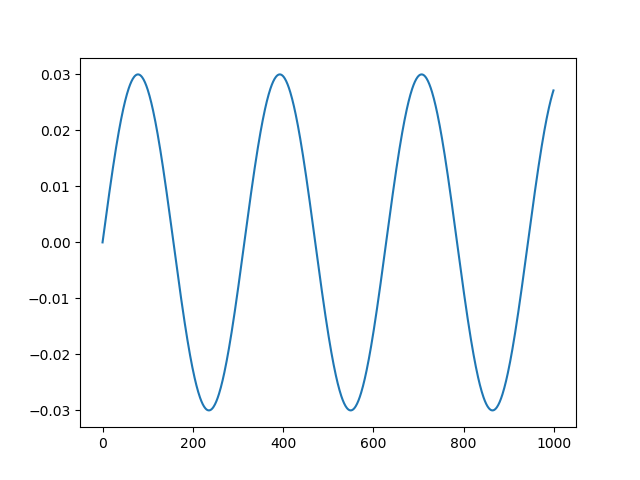

In [64]:
x = arange(1000)
y = sin(x/50) * 0.03
close()
plot(x, y)

<IPython.core.display.Javascript object>


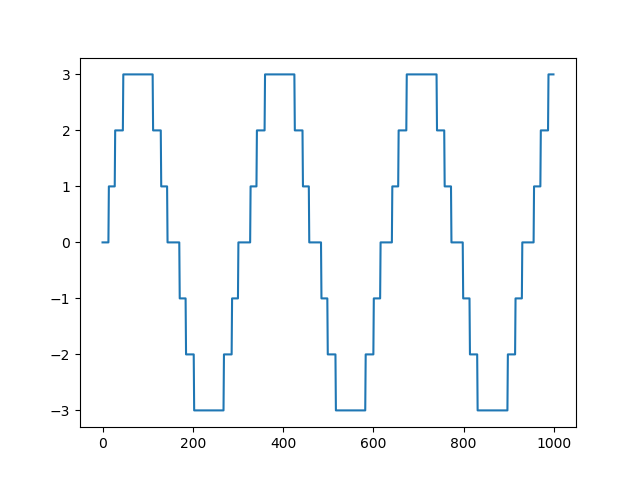

In [71]:
CH_WIDTH = 1
W = 2**((CH_WIDTH * 8) - 1)
samples = y * (W - 1)
samples_bytes = samples.astype('<i{}'.format(CH_WIDTH))
close()
plot(x, samples_bytes)